✅ Plot saved to: C:\Users\emmak\OneDrive\Documents\BA6\Experimental physical chemistry TP\Challenge B\Excel_Normalized_Plot.png


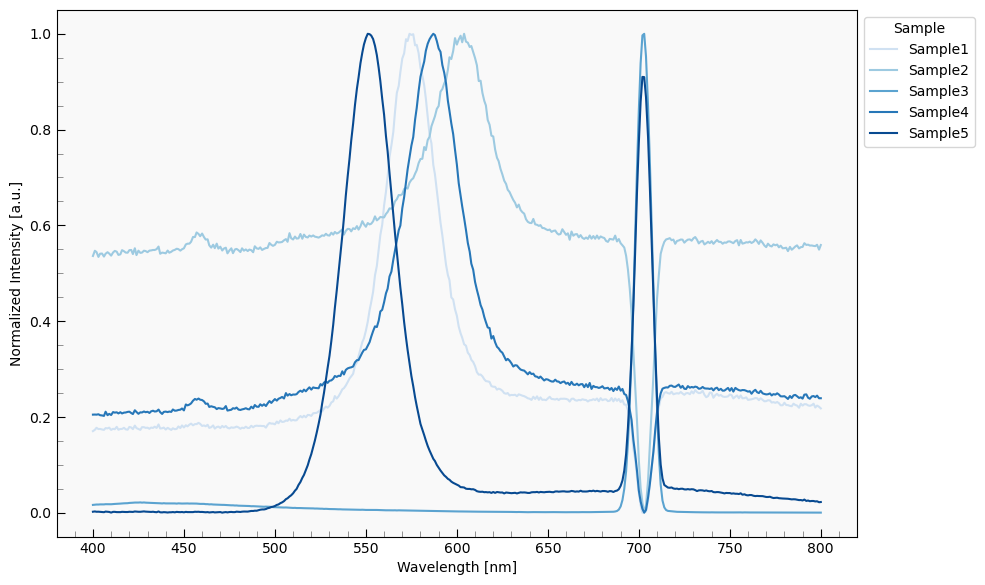

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# === File path ===
file_path = r"C:\Users\emmak\OneDrive\Documents\BA6\Experimental physical chemistry TP\Challenge B\fluo graph.xlsx"
folder_path = os.path.dirname(file_path)  # Use the same folder to save the plot

# === Read the Excel file ===
df = pd.read_excel(file_path, decimal=",")
df.rename(columns={df.columns[0]: "Wavelength"}, inplace=True)

# === Limit data to wavelengths <= 685 nm ===
#df = df[df["Wavelength"] <= 685]

# === Extract only normalized columns ===
norm_cols = [col for col in df.columns if isinstance(col, str) and "norm" in col]

# === Plotting ===
# Use shades of blue from the 'Blues' colormap
colors = plt.cm.Blues(np.linspace(0.2, 0.9, len(norm_cols)))

plt.figure(figsize=(10, 6))
for col, color in zip(norm_cols, colors):
    plt.plot(df["Wavelength"], df[col], label=col.replace("norm", "").strip(), color=color)

# === Customize plot ===
plt.xlabel("Wavelength [nm]")
plt.ylabel("Normalized Intensity [a.u.]")
#plt.title("Normalized Fluorescence Intensity vs. Wavelength")
plt.legend(title="Sample", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.gca().set_facecolor('#f9f9f9')
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=False, right=False)
plt.tick_params(which='minor', length=4, color='gray')
plt.tick_params(which='major', length=6)

# === Save the plot ===
def save_plot(directory, filename="Excel_Normalized_Plot.png", format="png"):
    os.makedirs(directory, exist_ok=True)
    filepath = os.path.join(directory, filename)
    plt.savefig(filepath, format=format, dpi=600, bbox_inches="tight")
    print(f"✅ Plot saved to: {filepath}")

save_plot(folder_path)

# === Show plot ===
plt.show()


In [ ]:
maxima = {}
for col in norm_cols:
    max_idx = df[col].idxmax()
    max_wavelength = df.loc[max_idx, "Wavelength"]
    max_intensity = df.loc[max_idx, col]
    maxima[col] = (max_wavelength, max_intensity)
    print(f"📈 {col}: max at {max_wavelength} nm with intensity {max_intensity}")


📈 Sample1norm: max at 573.9699707 nm with intensity 1.0
📈 Sample2norm: max at 603.9699707 nm with intensity 1.0
📈 Sample3norm: max at 426.0599976 nm with intensity 0.02138436501
📈 Sample4norm: max at 587.0499878 nm with intensity 1.0
📈 Sample5norm: max at 551.0200195 nm with intensity 1.0


In [ ]:
h = 6.626e-34       
c = 3.00e8           
e = 1.602e-19        
m_e = 9.109e-31      

m_e_star = 0.13 * m_e
m_h_star = 0.45 * m_e
Eg_bulk = 1.74 * e   

R_values = {}
for col, (lambda_nm, _) in maxima.items():
    lambda_m = lambda_nm * 1e-9
    E_photon = h * c / lambda_m
    denom = 8 * (E_photon - Eg_bulk)
    
    if denom <= 0:
        print(f"Skipping {col}: photon energy ≤ Eg_bulk (unphysical)")
        continue
    
    numerator = h**2 * (1 / m_e_star + 1 / m_h_star)
    R = np.sqrt(numerator / denom)
    R_values[col] = R * 1e9 * 2 # convert to nm
    print(f"🔬 {col}: D = {R_values[col]:.2f} nm")


🔬 Sample1norm: D = 5.95 nm
🔬 Sample2norm: D = 6.89 nm
🔬 Sample3norm: D = 3.57 nm
🔬 Sample4norm: D = 6.32 nm
🔬 Sample5norm: D = 5.40 nm
